# Page Rank Feature Selection algorithm evaluation

This notebook contains all the experiments that have been done to test the performance of the PageRank Feature Selection algorithm. It is part of the report of the final thesis of Josep Medialdea.

# Imports

In [140]:
import pandas as pd
from prfs.feature_selection import PageRankFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt

# Dataset initialization

In [158]:
dataset_name = 'regression'
drop_columns = []

dataset = pd.read_csv(f'datasets/{dataset_name}.csv').drop(columns=drop_columns)
features = dataset.iloc[:, 0:-1]
target = dataset.iloc[:,-1]

# Feature selection

In [159]:
prfs_params = {
    'graph':  'feature',
    'alpha':  'correlation',
    'beta':   'uncorrelation',
    'weight':  0.5
}

In [160]:
prfs = PageRankFeatureSelector(**prfs_params)
prfs.fit(features, target)
print(prfs.ranking())

RANKING
------
1: f3_f4_mul
2: f1_f2_sum
3: f4
4: f2
5: f3
6: f1
7: i3
8: i2
9: i1



# Classifier evaluation

In [125]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33)

accuracy_decision_tree = []
accuracy_naive_bayes = []

for n in range(len(features.columns)):
    clf = DecisionTreeClassifier()
    clf.fit(X_train[prfs.select(n + 1)], y_train)
    accuracy_decision_tree.append(clf.score(X_test[prfs.select(n + 1)], y_test))
    
    clf = GaussianNB()
    clf.fit(X_train[prfs.select(n + 1)], y_train)
    accuracy_naive_bayes.append(clf.score(X_test[prfs.select(n + 1)], y_test))
    

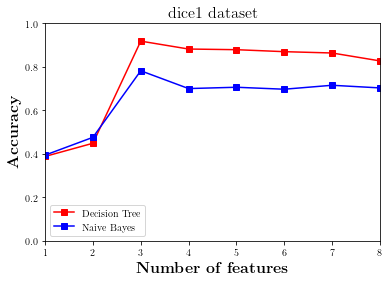

In [126]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'\textbf{Number of features}',fontsize=16)
plt.ylabel(r'\textbf{Accuracy}',fontsize=16)
plt.title(f'{dataset_name} dataset', fontsize=16)
plt.plot(range(1, len(accuracy_decision_tree) + 1), accuracy_decision_tree, marker='s', color='r', label='Decision Tree')
plt.plot(range(1, len(accuracy_naive_bayes) + 1), accuracy_naive_bayes, marker='s', color='b', label='Naive Bayes')
plt.xlim([1, len(features.columns)])
plt.ylim([0, 1])
plt.legend()
plt.show()

# Regressor evaluation

In [161]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33)

r2_svm = []

for n in range(len(features.columns)):
    ref = SVR()
    ref.fit(X_train[prfs.select(n + 1)], y_train)
    r2_svm.append(ref.score(X_test[prfs.select(n + 1)], y_test))

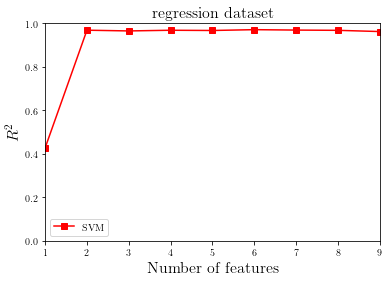

In [167]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'Number of features',fontsize=16)
plt.ylabel(r'\textbf{$R^2$}',fontsize=16)
plt.title(f'{dataset_name} dataset', fontsize=16)
plt.plot(range(1, len(r2_svm) + 1), r2_svm, marker='s', color='r', label='SVM')
plt.xlim([1, len(features.columns)])
plt.ylim([0, 1])
plt.legend()
plt.show()

In [157]:
y_test

2975     425000.0
936      271310.0
2442     206135.0
3610     234000.0
3250     362500.0
          ...    
2294    1010000.0
4261    2680000.0
2559     680000.0
3387     410000.0
667      139000.0
Name: price, Length: 1518, dtype: float64